
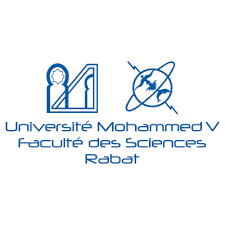

Réaliser Par:<BR>
    YOUSSEF EL WALI<BR>
Encadrer Par:<br>
    Hicham LAANAYA

<center><h2>La Réalisation d'un Réseaux de neurones(Mini-projet) 

<h2>1- L'objectif:

Vous devez développer un programme Python qui permet d'implémenter un réseau de neurones avec un nombre de noeuds d'entrée variable, un nombre de couches cachées variable et un nombre variable de neurones dans chaque couche cachée. Le réseau de neurones doit être capable de prendre des données en entrée, effectuer des calculs à travers les couches cachées et générer une sortie prédite.

Votre programme doit inclure les fonctionnalités suivantes :

1. Une fonction pour initialiser les poids et les biais du réseau de neurones.
2. Une fonction pour propager les données à travers le réseau (propagation avant).
3. Une fonction pour mettre à jour les poids et les biais en utilisant la rétropropagation du gradient.
4. Une fonction pour entraîner le réseau de neurones en utilisant un ensemble de données d'apprentissage.
5. Une fonction pour effectuer des prédictions sur de nouvelles données en utilisant le réseau de neurones entraîné.

Votre programme doit être flexible et permettre à l'utilisateur de spécifier le nombre de noeuds d'entrée, le nombre de couches cachées et le nombre de neurones dans chaque couche cachée. Il doit également être capable de gérer des tâches de classification ou de régression.

<b>1-Importer les bibliothéques nécessaire

In [438]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<b>2-La Création de modèle de Réseaux neurones

In [439]:
class NeuralNetwork:
    #un réseau de neurones avec un nombre de noeuds(input_nodes) d'entrée variable
    #un nombre de couches cachées(hidden_layers) variable et un nombre variable de neurones
    #dans chaque couche cachée(hidden_nodes)
    def __init__(self, input_nodes, hidden_layers, hidden_nodes, output_nodes):
        self.input_nodes = input_nodes
        self.hidden_layers = hidden_layers
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        self.weights, self.biases = self.initialize_weights_and_biases()
    #Une fonction pour initialiser les poids et les biais du réseau de neurones.  
    def initialize_weights_and_biases(self):
        weights = []
        biases = []
        # Initialize weights and biases for input to first hidden layer
        weights.append(np.random.randn(self.input_nodes, self.hidden_nodes))
        biases.append(np.zeros((1, self.hidden_nodes)))
        # Initialize weights and biases for hidden layers
        for _ in range(self.hidden_layers - 1):
            weights.append(np.random.randn(self.hidden_nodes, self.hidden_nodes))
            biases.append(np.zeros((1, self.hidden_nodes)))
        # Initialize weights and biases for last hidden layer to output
        weights.append(np.random.randn(self.hidden_nodes, self.output_nodes))
        biases.append(np.zeros((1, self.output_nodes)))
        return weights, biases
    #Une fonction pour propager les données à travers le réseau (propagation avant)
    
    def forward_propagation(self, inputs):
        self.layer_outputs = []
        self.layer_outputs.append(inputs)
        for i in range(self.hidden_layers + 1):
            layer_input = self.layer_outputs[i]
            layer_output = self.sigmoid(np.dot(layer_input, self.weights[i]) + self.biases[i])
            self.layer_outputs.append(layer_output)
        
        return self.layer_outputs[-1]
    #Une fonction pour mettre à jour les poids et les biais en utilisant la rétropropagation du gradient
    def backward_propagation(self, inputs, labels, learning_rate):
        batch_size = inputs.shape[0]
        
        # Compute gradients for the output layer
        error = (self.layer_outputs[-1] - labels) / batch_size
        delta = error * self.sigmoid_derivative(self.layer_outputs[-1])
        weight_gradient = np.dot(self.layer_outputs[-2].T, delta)
        bias_gradient = np.sum(delta, axis=0, keepdims=True)
        
        self.weights[-1] -= learning_rate * weight_gradient
        self.biases[-1] -= learning_rate * bias_gradient
        
        # Backpropagate the error to hidden layers
        for i in range(self.hidden_layers - 1, -1, -1):
            delta = np.dot(delta, self.weights[i + 1].T) * self.sigmoid_derivative(self.layer_outputs[i + 1])
            weight_gradient = np.dot(self.layer_outputs[i].T, delta)
            bias_gradient = np.sum(delta, axis=0, keepdims=True)
            
            self.weights[i] -= learning_rate * weight_gradient
            self.biases[i] -= learning_rate * bias_gradient
    #Une fonction pour entraîner le réseau de neurones en utilisant un ensemble de données d'apprentissage.
    def train(self, inputs, labels, learning_rate, num_epochs):
        loss_values=[]
        for epoch in range(num_epochs):
            # Forward propagation
            outputs = self.forward_propagation(inputs)
            
            # Backward propagation
            self.backward_propagation(inputs, labels, learning_rate)
            
            # Compute loss (MSE for regression, cross-entropy for classification)
            loss = self.mean_squared_error(outputs, labels)
            loss_values.append(loss) 
            
            # Print loss for each epoch
            print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss:.4f}")
        return loss_values
        
        print("Training finished.")
        
    #Une fonction pour effectuer des prédictions sur de nouvelles données en utilisant le réseau de neurones entraîné
        
    def predict(self, inputs):
        return self.forward_propagation(inputs)
    #En limitant les valeurs de sortie entre 0 et 1
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

<h2><center>Pour tester Notre  modèle, on utilise 3 exemples

<b>1-exemple <br> 
J'utilise un exemple simple

In [442]:
#La Création du réseau de neurones avec 3 nœuds d'entrée, 2 couches cachées (4 et 3 neurones) et 1 nœud pour le sortie
network = NeuralNetwork(input_nodes=3, hidden_layers=2, hidden_nodes=4, output_nodes=1)

# Données d'entraînement de modèle
inputs = np.array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
labels = np.array([[0], [1], [1], [0]])

# Entraînement du réseau de neurones
loss_values=network.train(inputs, labels, learning_rate=0.1, num_epochs=1000)

# Prédiction sur de nouvelles données
new_inputs = np.array([[0, 0, 1], [1, 0, 0]])
y_test=np.array([[0],[1]])
predictions = network.predict(new_inputs)

print("Predictions:")
print(predictions)


Epoch 1/1000, Loss: 0.2880
Epoch 2/1000, Loss: 0.2874
Epoch 3/1000, Loss: 0.2868
Epoch 4/1000, Loss: 0.2862
Epoch 5/1000, Loss: 0.2856
Epoch 6/1000, Loss: 0.2851
Epoch 7/1000, Loss: 0.2845
Epoch 8/1000, Loss: 0.2840
Epoch 9/1000, Loss: 0.2834
Epoch 10/1000, Loss: 0.2829
Epoch 11/1000, Loss: 0.2823
Epoch 12/1000, Loss: 0.2818
Epoch 13/1000, Loss: 0.2813
Epoch 14/1000, Loss: 0.2808
Epoch 15/1000, Loss: 0.2803
Epoch 16/1000, Loss: 0.2798
Epoch 17/1000, Loss: 0.2793
Epoch 18/1000, Loss: 0.2788
Epoch 19/1000, Loss: 0.2784
Epoch 20/1000, Loss: 0.2779
Epoch 21/1000, Loss: 0.2775
Epoch 22/1000, Loss: 0.2770
Epoch 23/1000, Loss: 0.2766
Epoch 24/1000, Loss: 0.2761
Epoch 25/1000, Loss: 0.2757
Epoch 26/1000, Loss: 0.2753
Epoch 27/1000, Loss: 0.2749
Epoch 28/1000, Loss: 0.2745
Epoch 29/1000, Loss: 0.2741
Epoch 30/1000, Loss: 0.2737
Epoch 31/1000, Loss: 0.2733
Epoch 32/1000, Loss: 0.2729
Epoch 33/1000, Loss: 0.2726
Epoch 34/1000, Loss: 0.2722
Epoch 35/1000, Loss: 0.2719
Epoch 36/1000, Loss: 0.2715
E

<b> on  Afficher le résultat de l'exactitude sous la forme d'une chaîne de caractères "Accuracy: accuracy", où accuracy est la valeur de l'exactitude calculé

In [443]:
true_labels = np.array([0, 1, 1, 0, 1])  
predicted_labels = np.round(predictions).astype(int)  
accuracy = np.mean(predicted_labels == true_labels) * 100
print("Accuracy:", accuracy)

Accuracy: 50.0


<b>  Cette Graphe montrer L'Evolution loss value a partir l'epoche(num_epochs)

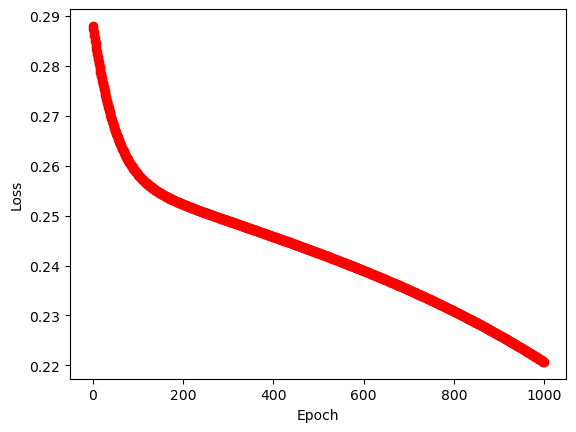

In [444]:
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss_values, 'ro')

<b>2-Exemple</b><br>
Dans ce dataset, je suis en train de créer un ensemble de données pour une tâche de classification binaire

In [445]:

# Set the number of samples
num_samples = 10000

# Set the number of features
num_features = 10

# Set the number of informative features
num_informative = 5

# Generate a synthetic classification dataset
X, y = make_classification(
    n_samples=num_samples,
    n_features=num_features,
    n_informative=num_informative,
    n_classes=2,
)

# Print the shape of the dataset
print("Dataset shape:", X.shape, y.shape)

network = NeuralNetwork(input_nodes=num_features, hidden_layers=2, hidden_nodes=4, output_nodes=1)

# Reshape the labels to match the network's output shape
y = y.reshape(-1, 1)
loss_values=network.train(X[:7000], y[:7000], learning_rate=0.1, num_epochs=10000)

# After training, you can make predictions on new data

predictions = network.predict(X[7000:])

print("Predictions:")
print(predictions)


Dataset shape: (10000, 10) (10000,)
Epoch 1/10000, Loss: 0.3133
Epoch 2/10000, Loss: 0.3123
Epoch 3/10000, Loss: 0.3114
Epoch 4/10000, Loss: 0.3104
Epoch 5/10000, Loss: 0.3095
Epoch 6/10000, Loss: 0.3086
Epoch 7/10000, Loss: 0.3076
Epoch 8/10000, Loss: 0.3067
Epoch 9/10000, Loss: 0.3058
Epoch 10/10000, Loss: 0.3049
Epoch 11/10000, Loss: 0.3040
Epoch 12/10000, Loss: 0.3031
Epoch 13/10000, Loss: 0.3022
Epoch 14/10000, Loss: 0.3013
Epoch 15/10000, Loss: 0.3005
Epoch 16/10000, Loss: 0.2996
Epoch 17/10000, Loss: 0.2988
Epoch 18/10000, Loss: 0.2979
Epoch 19/10000, Loss: 0.2971
Epoch 20/10000, Loss: 0.2963
Epoch 21/10000, Loss: 0.2955
Epoch 22/10000, Loss: 0.2947
Epoch 23/10000, Loss: 0.2939
Epoch 24/10000, Loss: 0.2931
Epoch 25/10000, Loss: 0.2923
Epoch 26/10000, Loss: 0.2915
Epoch 27/10000, Loss: 0.2908
Epoch 28/10000, Loss: 0.2900
Epoch 29/10000, Loss: 0.2893
Epoch 30/10000, Loss: 0.2886
Epoch 31/10000, Loss: 0.2879
Epoch 32/10000, Loss: 0.2871
Epoch 33/10000, Loss: 0.2864
Epoch 34/10000, 

Epoch 323/10000, Loss: 0.2352
Epoch 324/10000, Loss: 0.2351
Epoch 325/10000, Loss: 0.2351
Epoch 326/10000, Loss: 0.2350
Epoch 327/10000, Loss: 0.2349
Epoch 328/10000, Loss: 0.2349
Epoch 329/10000, Loss: 0.2348
Epoch 330/10000, Loss: 0.2347
Epoch 331/10000, Loss: 0.2346
Epoch 332/10000, Loss: 0.2346
Epoch 333/10000, Loss: 0.2345
Epoch 334/10000, Loss: 0.2344
Epoch 335/10000, Loss: 0.2344
Epoch 336/10000, Loss: 0.2343
Epoch 337/10000, Loss: 0.2342
Epoch 338/10000, Loss: 0.2341
Epoch 339/10000, Loss: 0.2341
Epoch 340/10000, Loss: 0.2340
Epoch 341/10000, Loss: 0.2339
Epoch 342/10000, Loss: 0.2339
Epoch 343/10000, Loss: 0.2338
Epoch 344/10000, Loss: 0.2337
Epoch 345/10000, Loss: 0.2336
Epoch 346/10000, Loss: 0.2336
Epoch 347/10000, Loss: 0.2335
Epoch 348/10000, Loss: 0.2334
Epoch 349/10000, Loss: 0.2334
Epoch 350/10000, Loss: 0.2333
Epoch 351/10000, Loss: 0.2332
Epoch 352/10000, Loss: 0.2331
Epoch 353/10000, Loss: 0.2331
Epoch 354/10000, Loss: 0.2330
Epoch 355/10000, Loss: 0.2329
Epoch 356/

Epoch 599/10000, Loss: 0.2164
Epoch 600/10000, Loss: 0.2164
Epoch 601/10000, Loss: 0.2163
Epoch 602/10000, Loss: 0.2162
Epoch 603/10000, Loss: 0.2162
Epoch 604/10000, Loss: 0.2161
Epoch 605/10000, Loss: 0.2160
Epoch 606/10000, Loss: 0.2160
Epoch 607/10000, Loss: 0.2159
Epoch 608/10000, Loss: 0.2158
Epoch 609/10000, Loss: 0.2158
Epoch 610/10000, Loss: 0.2157
Epoch 611/10000, Loss: 0.2156
Epoch 612/10000, Loss: 0.2156
Epoch 613/10000, Loss: 0.2155
Epoch 614/10000, Loss: 0.2155
Epoch 615/10000, Loss: 0.2154
Epoch 616/10000, Loss: 0.2153
Epoch 617/10000, Loss: 0.2153
Epoch 618/10000, Loss: 0.2152
Epoch 619/10000, Loss: 0.2151
Epoch 620/10000, Loss: 0.2151
Epoch 621/10000, Loss: 0.2150
Epoch 622/10000, Loss: 0.2149
Epoch 623/10000, Loss: 0.2149
Epoch 624/10000, Loss: 0.2148
Epoch 625/10000, Loss: 0.2147
Epoch 626/10000, Loss: 0.2147
Epoch 627/10000, Loss: 0.2146
Epoch 628/10000, Loss: 0.2145
Epoch 629/10000, Loss: 0.2145
Epoch 630/10000, Loss: 0.2144
Epoch 631/10000, Loss: 0.2143
Epoch 632/

Epoch 873/10000, Loss: 0.1989
Epoch 874/10000, Loss: 0.1988
Epoch 875/10000, Loss: 0.1988
Epoch 876/10000, Loss: 0.1987
Epoch 877/10000, Loss: 0.1986
Epoch 878/10000, Loss: 0.1986
Epoch 879/10000, Loss: 0.1985
Epoch 880/10000, Loss: 0.1984
Epoch 881/10000, Loss: 0.1984
Epoch 882/10000, Loss: 0.1983
Epoch 883/10000, Loss: 0.1983
Epoch 884/10000, Loss: 0.1982
Epoch 885/10000, Loss: 0.1981
Epoch 886/10000, Loss: 0.1981
Epoch 887/10000, Loss: 0.1980
Epoch 888/10000, Loss: 0.1979
Epoch 889/10000, Loss: 0.1979
Epoch 890/10000, Loss: 0.1978
Epoch 891/10000, Loss: 0.1978
Epoch 892/10000, Loss: 0.1977
Epoch 893/10000, Loss: 0.1976
Epoch 894/10000, Loss: 0.1976
Epoch 895/10000, Loss: 0.1975
Epoch 896/10000, Loss: 0.1974
Epoch 897/10000, Loss: 0.1974
Epoch 898/10000, Loss: 0.1973
Epoch 899/10000, Loss: 0.1973
Epoch 900/10000, Loss: 0.1972
Epoch 901/10000, Loss: 0.1971
Epoch 902/10000, Loss: 0.1971
Epoch 903/10000, Loss: 0.1970
Epoch 904/10000, Loss: 0.1969
Epoch 905/10000, Loss: 0.1969
Epoch 906/

Epoch 1147/10000, Loss: 0.1820
Epoch 1148/10000, Loss: 0.1820
Epoch 1149/10000, Loss: 0.1819
Epoch 1150/10000, Loss: 0.1819
Epoch 1151/10000, Loss: 0.1818
Epoch 1152/10000, Loss: 0.1817
Epoch 1153/10000, Loss: 0.1817
Epoch 1154/10000, Loss: 0.1816
Epoch 1155/10000, Loss: 0.1816
Epoch 1156/10000, Loss: 0.1815
Epoch 1157/10000, Loss: 0.1814
Epoch 1158/10000, Loss: 0.1814
Epoch 1159/10000, Loss: 0.1813
Epoch 1160/10000, Loss: 0.1813
Epoch 1161/10000, Loss: 0.1812
Epoch 1162/10000, Loss: 0.1811
Epoch 1163/10000, Loss: 0.1811
Epoch 1164/10000, Loss: 0.1810
Epoch 1165/10000, Loss: 0.1810
Epoch 1166/10000, Loss: 0.1809
Epoch 1167/10000, Loss: 0.1808
Epoch 1168/10000, Loss: 0.1808
Epoch 1169/10000, Loss: 0.1807
Epoch 1170/10000, Loss: 0.1807
Epoch 1171/10000, Loss: 0.1806
Epoch 1172/10000, Loss: 0.1805
Epoch 1173/10000, Loss: 0.1805
Epoch 1174/10000, Loss: 0.1804
Epoch 1175/10000, Loss: 0.1804
Epoch 1176/10000, Loss: 0.1803
Epoch 1177/10000, Loss: 0.1802
Epoch 1178/10000, Loss: 0.1802
Epoch 11

Epoch 1432/10000, Loss: 0.1655
Epoch 1433/10000, Loss: 0.1654
Epoch 1434/10000, Loss: 0.1653
Epoch 1435/10000, Loss: 0.1653
Epoch 1436/10000, Loss: 0.1652
Epoch 1437/10000, Loss: 0.1652
Epoch 1438/10000, Loss: 0.1651
Epoch 1439/10000, Loss: 0.1651
Epoch 1440/10000, Loss: 0.1650
Epoch 1441/10000, Loss: 0.1649
Epoch 1442/10000, Loss: 0.1649
Epoch 1443/10000, Loss: 0.1648
Epoch 1444/10000, Loss: 0.1648
Epoch 1445/10000, Loss: 0.1647
Epoch 1446/10000, Loss: 0.1647
Epoch 1447/10000, Loss: 0.1646
Epoch 1448/10000, Loss: 0.1646
Epoch 1449/10000, Loss: 0.1645
Epoch 1450/10000, Loss: 0.1644
Epoch 1451/10000, Loss: 0.1644
Epoch 1452/10000, Loss: 0.1643
Epoch 1453/10000, Loss: 0.1643
Epoch 1454/10000, Loss: 0.1642
Epoch 1455/10000, Loss: 0.1642
Epoch 1456/10000, Loss: 0.1641
Epoch 1457/10000, Loss: 0.1641
Epoch 1458/10000, Loss: 0.1640
Epoch 1459/10000, Loss: 0.1640
Epoch 1460/10000, Loss: 0.1639
Epoch 1461/10000, Loss: 0.1638
Epoch 1462/10000, Loss: 0.1638
Epoch 1463/10000, Loss: 0.1637
Epoch 14

Epoch 1707/10000, Loss: 0.1511
Epoch 1708/10000, Loss: 0.1510
Epoch 1709/10000, Loss: 0.1510
Epoch 1710/10000, Loss: 0.1510
Epoch 1711/10000, Loss: 0.1509
Epoch 1712/10000, Loss: 0.1509
Epoch 1713/10000, Loss: 0.1508
Epoch 1714/10000, Loss: 0.1508
Epoch 1715/10000, Loss: 0.1507
Epoch 1716/10000, Loss: 0.1507
Epoch 1717/10000, Loss: 0.1506
Epoch 1718/10000, Loss: 0.1506
Epoch 1719/10000, Loss: 0.1505
Epoch 1720/10000, Loss: 0.1505
Epoch 1721/10000, Loss: 0.1504
Epoch 1722/10000, Loss: 0.1504
Epoch 1723/10000, Loss: 0.1503
Epoch 1724/10000, Loss: 0.1503
Epoch 1725/10000, Loss: 0.1502
Epoch 1726/10000, Loss: 0.1502
Epoch 1727/10000, Loss: 0.1502
Epoch 1728/10000, Loss: 0.1501
Epoch 1729/10000, Loss: 0.1501
Epoch 1730/10000, Loss: 0.1500
Epoch 1731/10000, Loss: 0.1500
Epoch 1732/10000, Loss: 0.1499
Epoch 1733/10000, Loss: 0.1499
Epoch 1734/10000, Loss: 0.1498
Epoch 1735/10000, Loss: 0.1498
Epoch 1736/10000, Loss: 0.1497
Epoch 1737/10000, Loss: 0.1497
Epoch 1738/10000, Loss: 0.1496
Epoch 17

Epoch 1981/10000, Loss: 0.1397
Epoch 1982/10000, Loss: 0.1397
Epoch 1983/10000, Loss: 0.1396
Epoch 1984/10000, Loss: 0.1396
Epoch 1985/10000, Loss: 0.1396
Epoch 1986/10000, Loss: 0.1395
Epoch 1987/10000, Loss: 0.1395
Epoch 1988/10000, Loss: 0.1395
Epoch 1989/10000, Loss: 0.1394
Epoch 1990/10000, Loss: 0.1394
Epoch 1991/10000, Loss: 0.1394
Epoch 1992/10000, Loss: 0.1393
Epoch 1993/10000, Loss: 0.1393
Epoch 1994/10000, Loss: 0.1392
Epoch 1995/10000, Loss: 0.1392
Epoch 1996/10000, Loss: 0.1392
Epoch 1997/10000, Loss: 0.1391
Epoch 1998/10000, Loss: 0.1391
Epoch 1999/10000, Loss: 0.1391
Epoch 2000/10000, Loss: 0.1390
Epoch 2001/10000, Loss: 0.1390
Epoch 2002/10000, Loss: 0.1390
Epoch 2003/10000, Loss: 0.1389
Epoch 2004/10000, Loss: 0.1389
Epoch 2005/10000, Loss: 0.1389
Epoch 2006/10000, Loss: 0.1388
Epoch 2007/10000, Loss: 0.1388
Epoch 2008/10000, Loss: 0.1388
Epoch 2009/10000, Loss: 0.1387
Epoch 2010/10000, Loss: 0.1387
Epoch 2011/10000, Loss: 0.1386
Epoch 2012/10000, Loss: 0.1386
Epoch 20

Epoch 2267/10000, Loss: 0.1309
Epoch 2268/10000, Loss: 0.1308
Epoch 2269/10000, Loss: 0.1308
Epoch 2270/10000, Loss: 0.1308
Epoch 2271/10000, Loss: 0.1308
Epoch 2272/10000, Loss: 0.1307
Epoch 2273/10000, Loss: 0.1307
Epoch 2274/10000, Loss: 0.1307
Epoch 2275/10000, Loss: 0.1306
Epoch 2276/10000, Loss: 0.1306
Epoch 2277/10000, Loss: 0.1306
Epoch 2278/10000, Loss: 0.1306
Epoch 2279/10000, Loss: 0.1305
Epoch 2280/10000, Loss: 0.1305
Epoch 2281/10000, Loss: 0.1305
Epoch 2282/10000, Loss: 0.1305
Epoch 2283/10000, Loss: 0.1304
Epoch 2284/10000, Loss: 0.1304
Epoch 2285/10000, Loss: 0.1304
Epoch 2286/10000, Loss: 0.1304
Epoch 2287/10000, Loss: 0.1303
Epoch 2288/10000, Loss: 0.1303
Epoch 2289/10000, Loss: 0.1303
Epoch 2290/10000, Loss: 0.1303
Epoch 2291/10000, Loss: 0.1302
Epoch 2292/10000, Loss: 0.1302
Epoch 2293/10000, Loss: 0.1302
Epoch 2294/10000, Loss: 0.1301
Epoch 2295/10000, Loss: 0.1301
Epoch 2296/10000, Loss: 0.1301
Epoch 2297/10000, Loss: 0.1301
Epoch 2298/10000, Loss: 0.1300
Epoch 22

Epoch 2568/10000, Loss: 0.1239
Epoch 2569/10000, Loss: 0.1239
Epoch 2570/10000, Loss: 0.1239
Epoch 2571/10000, Loss: 0.1239
Epoch 2572/10000, Loss: 0.1239
Epoch 2573/10000, Loss: 0.1238
Epoch 2574/10000, Loss: 0.1238
Epoch 2575/10000, Loss: 0.1238
Epoch 2576/10000, Loss: 0.1238
Epoch 2577/10000, Loss: 0.1238
Epoch 2578/10000, Loss: 0.1237
Epoch 2579/10000, Loss: 0.1237
Epoch 2580/10000, Loss: 0.1237
Epoch 2581/10000, Loss: 0.1237
Epoch 2582/10000, Loss: 0.1237
Epoch 2583/10000, Loss: 0.1236
Epoch 2584/10000, Loss: 0.1236
Epoch 2585/10000, Loss: 0.1236
Epoch 2586/10000, Loss: 0.1236
Epoch 2587/10000, Loss: 0.1236
Epoch 2588/10000, Loss: 0.1235
Epoch 2589/10000, Loss: 0.1235
Epoch 2590/10000, Loss: 0.1235
Epoch 2591/10000, Loss: 0.1235
Epoch 2592/10000, Loss: 0.1235
Epoch 2593/10000, Loss: 0.1235
Epoch 2594/10000, Loss: 0.1234
Epoch 2595/10000, Loss: 0.1234
Epoch 2596/10000, Loss: 0.1234
Epoch 2597/10000, Loss: 0.1234
Epoch 2598/10000, Loss: 0.1234
Epoch 2599/10000, Loss: 0.1233
Epoch 26

Epoch 2880/10000, Loss: 0.1186
Epoch 2881/10000, Loss: 0.1185
Epoch 2882/10000, Loss: 0.1185
Epoch 2883/10000, Loss: 0.1185
Epoch 2884/10000, Loss: 0.1185
Epoch 2885/10000, Loss: 0.1185
Epoch 2886/10000, Loss: 0.1185
Epoch 2887/10000, Loss: 0.1184
Epoch 2888/10000, Loss: 0.1184
Epoch 2889/10000, Loss: 0.1184
Epoch 2890/10000, Loss: 0.1184
Epoch 2891/10000, Loss: 0.1184
Epoch 2892/10000, Loss: 0.1184
Epoch 2893/10000, Loss: 0.1184
Epoch 2894/10000, Loss: 0.1183
Epoch 2895/10000, Loss: 0.1183
Epoch 2896/10000, Loss: 0.1183
Epoch 2897/10000, Loss: 0.1183
Epoch 2898/10000, Loss: 0.1183
Epoch 2899/10000, Loss: 0.1183
Epoch 2900/10000, Loss: 0.1183
Epoch 2901/10000, Loss: 0.1182
Epoch 2902/10000, Loss: 0.1182
Epoch 2903/10000, Loss: 0.1182
Epoch 2904/10000, Loss: 0.1182
Epoch 2905/10000, Loss: 0.1182
Epoch 2906/10000, Loss: 0.1182
Epoch 2907/10000, Loss: 0.1181
Epoch 2908/10000, Loss: 0.1181
Epoch 2909/10000, Loss: 0.1181
Epoch 2910/10000, Loss: 0.1181
Epoch 2911/10000, Loss: 0.1181
Epoch 29

Epoch 3194/10000, Loss: 0.1144
Epoch 3195/10000, Loss: 0.1144
Epoch 3196/10000, Loss: 0.1144
Epoch 3197/10000, Loss: 0.1144
Epoch 3198/10000, Loss: 0.1144
Epoch 3199/10000, Loss: 0.1143
Epoch 3200/10000, Loss: 0.1143
Epoch 3201/10000, Loss: 0.1143
Epoch 3202/10000, Loss: 0.1143
Epoch 3203/10000, Loss: 0.1143
Epoch 3204/10000, Loss: 0.1143
Epoch 3205/10000, Loss: 0.1143
Epoch 3206/10000, Loss: 0.1143
Epoch 3207/10000, Loss: 0.1143
Epoch 3208/10000, Loss: 0.1142
Epoch 3209/10000, Loss: 0.1142
Epoch 3210/10000, Loss: 0.1142
Epoch 3211/10000, Loss: 0.1142
Epoch 3212/10000, Loss: 0.1142
Epoch 3213/10000, Loss: 0.1142
Epoch 3214/10000, Loss: 0.1142
Epoch 3215/10000, Loss: 0.1142
Epoch 3216/10000, Loss: 0.1142
Epoch 3217/10000, Loss: 0.1141
Epoch 3218/10000, Loss: 0.1141
Epoch 3219/10000, Loss: 0.1141
Epoch 3220/10000, Loss: 0.1141
Epoch 3221/10000, Loss: 0.1141
Epoch 3222/10000, Loss: 0.1141
Epoch 3223/10000, Loss: 0.1141
Epoch 3224/10000, Loss: 0.1141
Epoch 3225/10000, Loss: 0.1140
Epoch 32

Epoch 3511/10000, Loss: 0.1112
Epoch 3512/10000, Loss: 0.1111
Epoch 3513/10000, Loss: 0.1111
Epoch 3514/10000, Loss: 0.1111
Epoch 3515/10000, Loss: 0.1111
Epoch 3516/10000, Loss: 0.1111
Epoch 3517/10000, Loss: 0.1111
Epoch 3518/10000, Loss: 0.1111
Epoch 3519/10000, Loss: 0.1111
Epoch 3520/10000, Loss: 0.1111
Epoch 3521/10000, Loss: 0.1111
Epoch 3522/10000, Loss: 0.1111
Epoch 3523/10000, Loss: 0.1110
Epoch 3524/10000, Loss: 0.1110
Epoch 3525/10000, Loss: 0.1110
Epoch 3526/10000, Loss: 0.1110
Epoch 3527/10000, Loss: 0.1110
Epoch 3528/10000, Loss: 0.1110
Epoch 3529/10000, Loss: 0.1110
Epoch 3530/10000, Loss: 0.1110
Epoch 3531/10000, Loss: 0.1110
Epoch 3532/10000, Loss: 0.1110
Epoch 3533/10000, Loss: 0.1110
Epoch 3534/10000, Loss: 0.1109
Epoch 3535/10000, Loss: 0.1109
Epoch 3536/10000, Loss: 0.1109
Epoch 3537/10000, Loss: 0.1109
Epoch 3538/10000, Loss: 0.1109
Epoch 3539/10000, Loss: 0.1109
Epoch 3540/10000, Loss: 0.1109
Epoch 3541/10000, Loss: 0.1109
Epoch 3542/10000, Loss: 0.1109
Epoch 35

Epoch 3788/10000, Loss: 0.1089
Epoch 3789/10000, Loss: 0.1089
Epoch 3790/10000, Loss: 0.1089
Epoch 3791/10000, Loss: 0.1089
Epoch 3792/10000, Loss: 0.1089
Epoch 3793/10000, Loss: 0.1089
Epoch 3794/10000, Loss: 0.1089
Epoch 3795/10000, Loss: 0.1088
Epoch 3796/10000, Loss: 0.1088
Epoch 3797/10000, Loss: 0.1088
Epoch 3798/10000, Loss: 0.1088
Epoch 3799/10000, Loss: 0.1088
Epoch 3800/10000, Loss: 0.1088
Epoch 3801/10000, Loss: 0.1088
Epoch 3802/10000, Loss: 0.1088
Epoch 3803/10000, Loss: 0.1088
Epoch 3804/10000, Loss: 0.1088
Epoch 3805/10000, Loss: 0.1088
Epoch 3806/10000, Loss: 0.1088
Epoch 3807/10000, Loss: 0.1088
Epoch 3808/10000, Loss: 0.1088
Epoch 3809/10000, Loss: 0.1087
Epoch 3810/10000, Loss: 0.1087
Epoch 3811/10000, Loss: 0.1087
Epoch 3812/10000, Loss: 0.1087
Epoch 3813/10000, Loss: 0.1087
Epoch 3814/10000, Loss: 0.1087
Epoch 3815/10000, Loss: 0.1087
Epoch 3816/10000, Loss: 0.1087
Epoch 3817/10000, Loss: 0.1087
Epoch 3818/10000, Loss: 0.1087
Epoch 3819/10000, Loss: 0.1087
Epoch 38

Epoch 4064/10000, Loss: 0.1071
Epoch 4065/10000, Loss: 0.1071
Epoch 4066/10000, Loss: 0.1071
Epoch 4067/10000, Loss: 0.1071
Epoch 4068/10000, Loss: 0.1071
Epoch 4069/10000, Loss: 0.1071
Epoch 4070/10000, Loss: 0.1070
Epoch 4071/10000, Loss: 0.1070
Epoch 4072/10000, Loss: 0.1070
Epoch 4073/10000, Loss: 0.1070
Epoch 4074/10000, Loss: 0.1070
Epoch 4075/10000, Loss: 0.1070
Epoch 4076/10000, Loss: 0.1070
Epoch 4077/10000, Loss: 0.1070
Epoch 4078/10000, Loss: 0.1070
Epoch 4079/10000, Loss: 0.1070
Epoch 4080/10000, Loss: 0.1070
Epoch 4081/10000, Loss: 0.1070
Epoch 4082/10000, Loss: 0.1070
Epoch 4083/10000, Loss: 0.1070
Epoch 4084/10000, Loss: 0.1070
Epoch 4085/10000, Loss: 0.1070
Epoch 4086/10000, Loss: 0.1070
Epoch 4087/10000, Loss: 0.1069
Epoch 4088/10000, Loss: 0.1069
Epoch 4089/10000, Loss: 0.1069
Epoch 4090/10000, Loss: 0.1069
Epoch 4091/10000, Loss: 0.1069
Epoch 4092/10000, Loss: 0.1069
Epoch 4093/10000, Loss: 0.1069
Epoch 4094/10000, Loss: 0.1069
Epoch 4095/10000, Loss: 0.1069
Epoch 40

Epoch 4335/10000, Loss: 0.1056
Epoch 4336/10000, Loss: 0.1056
Epoch 4337/10000, Loss: 0.1056
Epoch 4338/10000, Loss: 0.1056
Epoch 4339/10000, Loss: 0.1056
Epoch 4340/10000, Loss: 0.1056
Epoch 4341/10000, Loss: 0.1056
Epoch 4342/10000, Loss: 0.1056
Epoch 4343/10000, Loss: 0.1056
Epoch 4344/10000, Loss: 0.1056
Epoch 4345/10000, Loss: 0.1056
Epoch 4346/10000, Loss: 0.1056
Epoch 4347/10000, Loss: 0.1056
Epoch 4348/10000, Loss: 0.1056
Epoch 4349/10000, Loss: 0.1056
Epoch 4350/10000, Loss: 0.1056
Epoch 4351/10000, Loss: 0.1056
Epoch 4352/10000, Loss: 0.1056
Epoch 4353/10000, Loss: 0.1056
Epoch 4354/10000, Loss: 0.1055
Epoch 4355/10000, Loss: 0.1055
Epoch 4356/10000, Loss: 0.1055
Epoch 4357/10000, Loss: 0.1055
Epoch 4358/10000, Loss: 0.1055
Epoch 4359/10000, Loss: 0.1055
Epoch 4360/10000, Loss: 0.1055
Epoch 4361/10000, Loss: 0.1055
Epoch 4362/10000, Loss: 0.1055
Epoch 4363/10000, Loss: 0.1055
Epoch 4364/10000, Loss: 0.1055
Epoch 4365/10000, Loss: 0.1055
Epoch 4366/10000, Loss: 0.1055
Epoch 43

Epoch 4661/10000, Loss: 0.1042
Epoch 4662/10000, Loss: 0.1042
Epoch 4663/10000, Loss: 0.1042
Epoch 4664/10000, Loss: 0.1042
Epoch 4665/10000, Loss: 0.1042
Epoch 4666/10000, Loss: 0.1042
Epoch 4667/10000, Loss: 0.1042
Epoch 4668/10000, Loss: 0.1042
Epoch 4669/10000, Loss: 0.1042
Epoch 4670/10000, Loss: 0.1042
Epoch 4671/10000, Loss: 0.1042
Epoch 4672/10000, Loss: 0.1042
Epoch 4673/10000, Loss: 0.1042
Epoch 4674/10000, Loss: 0.1042
Epoch 4675/10000, Loss: 0.1042
Epoch 4676/10000, Loss: 0.1042
Epoch 4677/10000, Loss: 0.1042
Epoch 4678/10000, Loss: 0.1042
Epoch 4679/10000, Loss: 0.1042
Epoch 4680/10000, Loss: 0.1042
Epoch 4681/10000, Loss: 0.1042
Epoch 4682/10000, Loss: 0.1042
Epoch 4683/10000, Loss: 0.1042
Epoch 4684/10000, Loss: 0.1042
Epoch 4685/10000, Loss: 0.1041
Epoch 4686/10000, Loss: 0.1041
Epoch 4687/10000, Loss: 0.1041
Epoch 4688/10000, Loss: 0.1041
Epoch 4689/10000, Loss: 0.1041
Epoch 4690/10000, Loss: 0.1041
Epoch 4691/10000, Loss: 0.1041
Epoch 4692/10000, Loss: 0.1041
Epoch 46

Epoch 4934/10000, Loss: 0.1033
Epoch 4935/10000, Loss: 0.1033
Epoch 4936/10000, Loss: 0.1033
Epoch 4937/10000, Loss: 0.1033
Epoch 4938/10000, Loss: 0.1033
Epoch 4939/10000, Loss: 0.1033
Epoch 4940/10000, Loss: 0.1033
Epoch 4941/10000, Loss: 0.1033
Epoch 4942/10000, Loss: 0.1033
Epoch 4943/10000, Loss: 0.1033
Epoch 4944/10000, Loss: 0.1033
Epoch 4945/10000, Loss: 0.1033
Epoch 4946/10000, Loss: 0.1033
Epoch 4947/10000, Loss: 0.1033
Epoch 4948/10000, Loss: 0.1032
Epoch 4949/10000, Loss: 0.1032
Epoch 4950/10000, Loss: 0.1032
Epoch 4951/10000, Loss: 0.1032
Epoch 4952/10000, Loss: 0.1032
Epoch 4953/10000, Loss: 0.1032
Epoch 4954/10000, Loss: 0.1032
Epoch 4955/10000, Loss: 0.1032
Epoch 4956/10000, Loss: 0.1032
Epoch 4957/10000, Loss: 0.1032
Epoch 4958/10000, Loss: 0.1032
Epoch 4959/10000, Loss: 0.1032
Epoch 4960/10000, Loss: 0.1032
Epoch 4961/10000, Loss: 0.1032
Epoch 4962/10000, Loss: 0.1032
Epoch 4963/10000, Loss: 0.1032
Epoch 4964/10000, Loss: 0.1032
Epoch 4965/10000, Loss: 0.1032
Epoch 49

Epoch 5210/10000, Loss: 0.1025
Epoch 5211/10000, Loss: 0.1025
Epoch 5212/10000, Loss: 0.1025
Epoch 5213/10000, Loss: 0.1025
Epoch 5214/10000, Loss: 0.1025
Epoch 5215/10000, Loss: 0.1025
Epoch 5216/10000, Loss: 0.1025
Epoch 5217/10000, Loss: 0.1025
Epoch 5218/10000, Loss: 0.1025
Epoch 5219/10000, Loss: 0.1025
Epoch 5220/10000, Loss: 0.1025
Epoch 5221/10000, Loss: 0.1025
Epoch 5222/10000, Loss: 0.1025
Epoch 5223/10000, Loss: 0.1025
Epoch 5224/10000, Loss: 0.1025
Epoch 5225/10000, Loss: 0.1025
Epoch 5226/10000, Loss: 0.1025
Epoch 5227/10000, Loss: 0.1025
Epoch 5228/10000, Loss: 0.1025
Epoch 5229/10000, Loss: 0.1025
Epoch 5230/10000, Loss: 0.1025
Epoch 5231/10000, Loss: 0.1024
Epoch 5232/10000, Loss: 0.1024
Epoch 5233/10000, Loss: 0.1024
Epoch 5234/10000, Loss: 0.1024
Epoch 5235/10000, Loss: 0.1024
Epoch 5236/10000, Loss: 0.1024
Epoch 5237/10000, Loss: 0.1024
Epoch 5238/10000, Loss: 0.1024
Epoch 5239/10000, Loss: 0.1024
Epoch 5240/10000, Loss: 0.1024
Epoch 5241/10000, Loss: 0.1024
Epoch 52

Epoch 5495/10000, Loss: 0.1018
Epoch 5496/10000, Loss: 0.1018
Epoch 5497/10000, Loss: 0.1018
Epoch 5498/10000, Loss: 0.1018
Epoch 5499/10000, Loss: 0.1018
Epoch 5500/10000, Loss: 0.1018
Epoch 5501/10000, Loss: 0.1018
Epoch 5502/10000, Loss: 0.1018
Epoch 5503/10000, Loss: 0.1018
Epoch 5504/10000, Loss: 0.1018
Epoch 5505/10000, Loss: 0.1018
Epoch 5506/10000, Loss: 0.1018
Epoch 5507/10000, Loss: 0.1018
Epoch 5508/10000, Loss: 0.1018
Epoch 5509/10000, Loss: 0.1018
Epoch 5510/10000, Loss: 0.1018
Epoch 5511/10000, Loss: 0.1018
Epoch 5512/10000, Loss: 0.1018
Epoch 5513/10000, Loss: 0.1018
Epoch 5514/10000, Loss: 0.1018
Epoch 5515/10000, Loss: 0.1018
Epoch 5516/10000, Loss: 0.1018
Epoch 5517/10000, Loss: 0.1018
Epoch 5518/10000, Loss: 0.1018
Epoch 5519/10000, Loss: 0.1018
Epoch 5520/10000, Loss: 0.1018
Epoch 5521/10000, Loss: 0.1018
Epoch 5522/10000, Loss: 0.1018
Epoch 5523/10000, Loss: 0.1018
Epoch 5524/10000, Loss: 0.1018
Epoch 5525/10000, Loss: 0.1018
Epoch 5526/10000, Loss: 0.1018
Epoch 55

Epoch 5775/10000, Loss: 0.1013
Epoch 5776/10000, Loss: 0.1013
Epoch 5777/10000, Loss: 0.1013
Epoch 5778/10000, Loss: 0.1013
Epoch 5779/10000, Loss: 0.1013
Epoch 5780/10000, Loss: 0.1013
Epoch 5781/10000, Loss: 0.1012
Epoch 5782/10000, Loss: 0.1012
Epoch 5783/10000, Loss: 0.1012
Epoch 5784/10000, Loss: 0.1012
Epoch 5785/10000, Loss: 0.1012
Epoch 5786/10000, Loss: 0.1012
Epoch 5787/10000, Loss: 0.1012
Epoch 5788/10000, Loss: 0.1012
Epoch 5789/10000, Loss: 0.1012
Epoch 5790/10000, Loss: 0.1012
Epoch 5791/10000, Loss: 0.1012
Epoch 5792/10000, Loss: 0.1012
Epoch 5793/10000, Loss: 0.1012
Epoch 5794/10000, Loss: 0.1012
Epoch 5795/10000, Loss: 0.1012
Epoch 5796/10000, Loss: 0.1012
Epoch 5797/10000, Loss: 0.1012
Epoch 5798/10000, Loss: 0.1012
Epoch 5799/10000, Loss: 0.1012
Epoch 5800/10000, Loss: 0.1012
Epoch 5801/10000, Loss: 0.1012
Epoch 5802/10000, Loss: 0.1012
Epoch 5803/10000, Loss: 0.1012
Epoch 5804/10000, Loss: 0.1012
Epoch 5805/10000, Loss: 0.1012
Epoch 5806/10000, Loss: 0.1012
Epoch 58

Epoch 6058/10000, Loss: 0.1008
Epoch 6059/10000, Loss: 0.1008
Epoch 6060/10000, Loss: 0.1008
Epoch 6061/10000, Loss: 0.1008
Epoch 6062/10000, Loss: 0.1008
Epoch 6063/10000, Loss: 0.1008
Epoch 6064/10000, Loss: 0.1008
Epoch 6065/10000, Loss: 0.1008
Epoch 6066/10000, Loss: 0.1008
Epoch 6067/10000, Loss: 0.1008
Epoch 6068/10000, Loss: 0.1008
Epoch 6069/10000, Loss: 0.1008
Epoch 6070/10000, Loss: 0.1008
Epoch 6071/10000, Loss: 0.1008
Epoch 6072/10000, Loss: 0.1007
Epoch 6073/10000, Loss: 0.1007
Epoch 6074/10000, Loss: 0.1007
Epoch 6075/10000, Loss: 0.1007
Epoch 6076/10000, Loss: 0.1007
Epoch 6077/10000, Loss: 0.1007
Epoch 6078/10000, Loss: 0.1007
Epoch 6079/10000, Loss: 0.1007
Epoch 6080/10000, Loss: 0.1007
Epoch 6081/10000, Loss: 0.1007
Epoch 6082/10000, Loss: 0.1007
Epoch 6083/10000, Loss: 0.1007
Epoch 6084/10000, Loss: 0.1007
Epoch 6085/10000, Loss: 0.1007
Epoch 6086/10000, Loss: 0.1007
Epoch 6087/10000, Loss: 0.1007
Epoch 6088/10000, Loss: 0.1007
Epoch 6089/10000, Loss: 0.1007
Epoch 60

Epoch 6345/10000, Loss: 0.1003
Epoch 6346/10000, Loss: 0.1003
Epoch 6347/10000, Loss: 0.1003
Epoch 6348/10000, Loss: 0.1003
Epoch 6349/10000, Loss: 0.1003
Epoch 6350/10000, Loss: 0.1003
Epoch 6351/10000, Loss: 0.1003
Epoch 6352/10000, Loss: 0.1003
Epoch 6353/10000, Loss: 0.1003
Epoch 6354/10000, Loss: 0.1003
Epoch 6355/10000, Loss: 0.1003
Epoch 6356/10000, Loss: 0.1003
Epoch 6357/10000, Loss: 0.1003
Epoch 6358/10000, Loss: 0.1003
Epoch 6359/10000, Loss: 0.1003
Epoch 6360/10000, Loss: 0.1003
Epoch 6361/10000, Loss: 0.1003
Epoch 6362/10000, Loss: 0.1003
Epoch 6363/10000, Loss: 0.1003
Epoch 6364/10000, Loss: 0.1003
Epoch 6365/10000, Loss: 0.1003
Epoch 6366/10000, Loss: 0.1003
Epoch 6367/10000, Loss: 0.1003
Epoch 6368/10000, Loss: 0.1003
Epoch 6369/10000, Loss: 0.1003
Epoch 6370/10000, Loss: 0.1003
Epoch 6371/10000, Loss: 0.1003
Epoch 6372/10000, Loss: 0.1003
Epoch 6373/10000, Loss: 0.1003
Epoch 6374/10000, Loss: 0.1003
Epoch 6375/10000, Loss: 0.1003
Epoch 6376/10000, Loss: 0.1003
Epoch 63

Epoch 6659/10000, Loss: 0.0999
Epoch 6660/10000, Loss: 0.0999
Epoch 6661/10000, Loss: 0.0999
Epoch 6662/10000, Loss: 0.0999
Epoch 6663/10000, Loss: 0.0999
Epoch 6664/10000, Loss: 0.0999
Epoch 6665/10000, Loss: 0.0999
Epoch 6666/10000, Loss: 0.0999
Epoch 6667/10000, Loss: 0.0999
Epoch 6668/10000, Loss: 0.0999
Epoch 6669/10000, Loss: 0.0999
Epoch 6670/10000, Loss: 0.0999
Epoch 6671/10000, Loss: 0.0999
Epoch 6672/10000, Loss: 0.0999
Epoch 6673/10000, Loss: 0.0999
Epoch 6674/10000, Loss: 0.0999
Epoch 6675/10000, Loss: 0.0999
Epoch 6676/10000, Loss: 0.0999
Epoch 6677/10000, Loss: 0.0999
Epoch 6678/10000, Loss: 0.0999
Epoch 6679/10000, Loss: 0.0999
Epoch 6680/10000, Loss: 0.0999
Epoch 6681/10000, Loss: 0.0999
Epoch 6682/10000, Loss: 0.0999
Epoch 6683/10000, Loss: 0.0999
Epoch 6684/10000, Loss: 0.0999
Epoch 6685/10000, Loss: 0.0999
Epoch 6686/10000, Loss: 0.0999
Epoch 6687/10000, Loss: 0.0999
Epoch 6688/10000, Loss: 0.0999
Epoch 6689/10000, Loss: 0.0999
Epoch 6690/10000, Loss: 0.0999
Epoch 66

Epoch 6975/10000, Loss: 0.0996
Epoch 6976/10000, Loss: 0.0996
Epoch 6977/10000, Loss: 0.0996
Epoch 6978/10000, Loss: 0.0996
Epoch 6979/10000, Loss: 0.0996
Epoch 6980/10000, Loss: 0.0996
Epoch 6981/10000, Loss: 0.0996
Epoch 6982/10000, Loss: 0.0996
Epoch 6983/10000, Loss: 0.0996
Epoch 6984/10000, Loss: 0.0996
Epoch 6985/10000, Loss: 0.0996
Epoch 6986/10000, Loss: 0.0996
Epoch 6987/10000, Loss: 0.0996
Epoch 6988/10000, Loss: 0.0996
Epoch 6989/10000, Loss: 0.0996
Epoch 6990/10000, Loss: 0.0996
Epoch 6991/10000, Loss: 0.0996
Epoch 6992/10000, Loss: 0.0996
Epoch 6993/10000, Loss: 0.0996
Epoch 6994/10000, Loss: 0.0996
Epoch 6995/10000, Loss: 0.0996
Epoch 6996/10000, Loss: 0.0996
Epoch 6997/10000, Loss: 0.0996
Epoch 6998/10000, Loss: 0.0996
Epoch 6999/10000, Loss: 0.0995
Epoch 7000/10000, Loss: 0.0995
Epoch 7001/10000, Loss: 0.0995
Epoch 7002/10000, Loss: 0.0995
Epoch 7003/10000, Loss: 0.0995
Epoch 7004/10000, Loss: 0.0995
Epoch 7005/10000, Loss: 0.0995
Epoch 7006/10000, Loss: 0.0995
Epoch 70

Epoch 7304/10000, Loss: 0.0992
Epoch 7305/10000, Loss: 0.0992
Epoch 7306/10000, Loss: 0.0992
Epoch 7307/10000, Loss: 0.0992
Epoch 7308/10000, Loss: 0.0992
Epoch 7309/10000, Loss: 0.0992
Epoch 7310/10000, Loss: 0.0992
Epoch 7311/10000, Loss: 0.0992
Epoch 7312/10000, Loss: 0.0992
Epoch 7313/10000, Loss: 0.0992
Epoch 7314/10000, Loss: 0.0992
Epoch 7315/10000, Loss: 0.0992
Epoch 7316/10000, Loss: 0.0992
Epoch 7317/10000, Loss: 0.0992
Epoch 7318/10000, Loss: 0.0992
Epoch 7319/10000, Loss: 0.0992
Epoch 7320/10000, Loss: 0.0992
Epoch 7321/10000, Loss: 0.0992
Epoch 7322/10000, Loss: 0.0992
Epoch 7323/10000, Loss: 0.0992
Epoch 7324/10000, Loss: 0.0992
Epoch 7325/10000, Loss: 0.0992
Epoch 7326/10000, Loss: 0.0992
Epoch 7327/10000, Loss: 0.0992
Epoch 7328/10000, Loss: 0.0992
Epoch 7329/10000, Loss: 0.0992
Epoch 7330/10000, Loss: 0.0992
Epoch 7331/10000, Loss: 0.0992
Epoch 7332/10000, Loss: 0.0992
Epoch 7333/10000, Loss: 0.0992
Epoch 7334/10000, Loss: 0.0992
Epoch 7335/10000, Loss: 0.0992
Epoch 73

Epoch 7577/10000, Loss: 0.0990
Epoch 7578/10000, Loss: 0.0990
Epoch 7579/10000, Loss: 0.0990
Epoch 7580/10000, Loss: 0.0990
Epoch 7581/10000, Loss: 0.0990
Epoch 7582/10000, Loss: 0.0990
Epoch 7583/10000, Loss: 0.0990
Epoch 7584/10000, Loss: 0.0990
Epoch 7585/10000, Loss: 0.0990
Epoch 7586/10000, Loss: 0.0990
Epoch 7587/10000, Loss: 0.0990
Epoch 7588/10000, Loss: 0.0990
Epoch 7589/10000, Loss: 0.0990
Epoch 7590/10000, Loss: 0.0990
Epoch 7591/10000, Loss: 0.0990
Epoch 7592/10000, Loss: 0.0990
Epoch 7593/10000, Loss: 0.0990
Epoch 7594/10000, Loss: 0.0990
Epoch 7595/10000, Loss: 0.0990
Epoch 7596/10000, Loss: 0.0990
Epoch 7597/10000, Loss: 0.0990
Epoch 7598/10000, Loss: 0.0990
Epoch 7599/10000, Loss: 0.0990
Epoch 7600/10000, Loss: 0.0990
Epoch 7601/10000, Loss: 0.0990
Epoch 7602/10000, Loss: 0.0990
Epoch 7603/10000, Loss: 0.0990
Epoch 7604/10000, Loss: 0.0990
Epoch 7605/10000, Loss: 0.0990
Epoch 7606/10000, Loss: 0.0990
Epoch 7607/10000, Loss: 0.0990
Epoch 7608/10000, Loss: 0.0990
Epoch 76

Epoch 7885/10000, Loss: 0.0987
Epoch 7886/10000, Loss: 0.0987
Epoch 7887/10000, Loss: 0.0987
Epoch 7888/10000, Loss: 0.0987
Epoch 7889/10000, Loss: 0.0987
Epoch 7890/10000, Loss: 0.0987
Epoch 7891/10000, Loss: 0.0987
Epoch 7892/10000, Loss: 0.0987
Epoch 7893/10000, Loss: 0.0987
Epoch 7894/10000, Loss: 0.0987
Epoch 7895/10000, Loss: 0.0987
Epoch 7896/10000, Loss: 0.0987
Epoch 7897/10000, Loss: 0.0987
Epoch 7898/10000, Loss: 0.0987
Epoch 7899/10000, Loss: 0.0987
Epoch 7900/10000, Loss: 0.0987
Epoch 7901/10000, Loss: 0.0987
Epoch 7902/10000, Loss: 0.0987
Epoch 7903/10000, Loss: 0.0987
Epoch 7904/10000, Loss: 0.0987
Epoch 7905/10000, Loss: 0.0987
Epoch 7906/10000, Loss: 0.0987
Epoch 7907/10000, Loss: 0.0987
Epoch 7908/10000, Loss: 0.0987
Epoch 7909/10000, Loss: 0.0987
Epoch 7910/10000, Loss: 0.0987
Epoch 7911/10000, Loss: 0.0987
Epoch 7912/10000, Loss: 0.0987
Epoch 7913/10000, Loss: 0.0987
Epoch 7914/10000, Loss: 0.0987
Epoch 7915/10000, Loss: 0.0987
Epoch 7916/10000, Loss: 0.0987
Epoch 79

Epoch 8189/10000, Loss: 0.0985
Epoch 8190/10000, Loss: 0.0985
Epoch 8191/10000, Loss: 0.0985
Epoch 8192/10000, Loss: 0.0985
Epoch 8193/10000, Loss: 0.0985
Epoch 8194/10000, Loss: 0.0985
Epoch 8195/10000, Loss: 0.0985
Epoch 8196/10000, Loss: 0.0985
Epoch 8197/10000, Loss: 0.0985
Epoch 8198/10000, Loss: 0.0985
Epoch 8199/10000, Loss: 0.0985
Epoch 8200/10000, Loss: 0.0985
Epoch 8201/10000, Loss: 0.0985
Epoch 8202/10000, Loss: 0.0985
Epoch 8203/10000, Loss: 0.0985
Epoch 8204/10000, Loss: 0.0985
Epoch 8205/10000, Loss: 0.0985
Epoch 8206/10000, Loss: 0.0985
Epoch 8207/10000, Loss: 0.0985
Epoch 8208/10000, Loss: 0.0985
Epoch 8209/10000, Loss: 0.0985
Epoch 8210/10000, Loss: 0.0985
Epoch 8211/10000, Loss: 0.0985
Epoch 8212/10000, Loss: 0.0985
Epoch 8213/10000, Loss: 0.0985
Epoch 8214/10000, Loss: 0.0985
Epoch 8215/10000, Loss: 0.0985
Epoch 8216/10000, Loss: 0.0985
Epoch 8217/10000, Loss: 0.0985
Epoch 8218/10000, Loss: 0.0985
Epoch 8219/10000, Loss: 0.0985
Epoch 8220/10000, Loss: 0.0985
Epoch 82

Epoch 8492/10000, Loss: 0.0983
Epoch 8493/10000, Loss: 0.0983
Epoch 8494/10000, Loss: 0.0983
Epoch 8495/10000, Loss: 0.0983
Epoch 8496/10000, Loss: 0.0983
Epoch 8497/10000, Loss: 0.0983
Epoch 8498/10000, Loss: 0.0983
Epoch 8499/10000, Loss: 0.0983
Epoch 8500/10000, Loss: 0.0983
Epoch 8501/10000, Loss: 0.0983
Epoch 8502/10000, Loss: 0.0983
Epoch 8503/10000, Loss: 0.0983
Epoch 8504/10000, Loss: 0.0983
Epoch 8505/10000, Loss: 0.0983
Epoch 8506/10000, Loss: 0.0983
Epoch 8507/10000, Loss: 0.0983
Epoch 8508/10000, Loss: 0.0983
Epoch 8509/10000, Loss: 0.0983
Epoch 8510/10000, Loss: 0.0983
Epoch 8511/10000, Loss: 0.0983
Epoch 8512/10000, Loss: 0.0983
Epoch 8513/10000, Loss: 0.0983
Epoch 8514/10000, Loss: 0.0983
Epoch 8515/10000, Loss: 0.0983
Epoch 8516/10000, Loss: 0.0983
Epoch 8517/10000, Loss: 0.0983
Epoch 8518/10000, Loss: 0.0983
Epoch 8519/10000, Loss: 0.0983
Epoch 8520/10000, Loss: 0.0983
Epoch 8521/10000, Loss: 0.0983
Epoch 8522/10000, Loss: 0.0983
Epoch 8523/10000, Loss: 0.0983
Epoch 85

Epoch 8770/10000, Loss: 0.0981
Epoch 8771/10000, Loss: 0.0981
Epoch 8772/10000, Loss: 0.0981
Epoch 8773/10000, Loss: 0.0981
Epoch 8774/10000, Loss: 0.0981
Epoch 8775/10000, Loss: 0.0981
Epoch 8776/10000, Loss: 0.0981
Epoch 8777/10000, Loss: 0.0981
Epoch 8778/10000, Loss: 0.0981
Epoch 8779/10000, Loss: 0.0981
Epoch 8780/10000, Loss: 0.0981
Epoch 8781/10000, Loss: 0.0981
Epoch 8782/10000, Loss: 0.0981
Epoch 8783/10000, Loss: 0.0981
Epoch 8784/10000, Loss: 0.0981
Epoch 8785/10000, Loss: 0.0981
Epoch 8786/10000, Loss: 0.0981
Epoch 8787/10000, Loss: 0.0981
Epoch 8788/10000, Loss: 0.0981
Epoch 8789/10000, Loss: 0.0981
Epoch 8790/10000, Loss: 0.0981
Epoch 8791/10000, Loss: 0.0981
Epoch 8792/10000, Loss: 0.0981
Epoch 8793/10000, Loss: 0.0981
Epoch 8794/10000, Loss: 0.0981
Epoch 8795/10000, Loss: 0.0981
Epoch 8796/10000, Loss: 0.0981
Epoch 8797/10000, Loss: 0.0981
Epoch 8798/10000, Loss: 0.0981
Epoch 8799/10000, Loss: 0.0981
Epoch 8800/10000, Loss: 0.0981
Epoch 8801/10000, Loss: 0.0981
Epoch 88

Epoch 9036/10000, Loss: 0.0980
Epoch 9037/10000, Loss: 0.0980
Epoch 9038/10000, Loss: 0.0980
Epoch 9039/10000, Loss: 0.0980
Epoch 9040/10000, Loss: 0.0980
Epoch 9041/10000, Loss: 0.0980
Epoch 9042/10000, Loss: 0.0980
Epoch 9043/10000, Loss: 0.0980
Epoch 9044/10000, Loss: 0.0980
Epoch 9045/10000, Loss: 0.0980
Epoch 9046/10000, Loss: 0.0980
Epoch 9047/10000, Loss: 0.0980
Epoch 9048/10000, Loss: 0.0980
Epoch 9049/10000, Loss: 0.0980
Epoch 9050/10000, Loss: 0.0980
Epoch 9051/10000, Loss: 0.0980
Epoch 9052/10000, Loss: 0.0980
Epoch 9053/10000, Loss: 0.0980
Epoch 9054/10000, Loss: 0.0980
Epoch 9055/10000, Loss: 0.0980
Epoch 9056/10000, Loss: 0.0980
Epoch 9057/10000, Loss: 0.0980
Epoch 9058/10000, Loss: 0.0980
Epoch 9059/10000, Loss: 0.0980
Epoch 9060/10000, Loss: 0.0980
Epoch 9061/10000, Loss: 0.0980
Epoch 9062/10000, Loss: 0.0980
Epoch 9063/10000, Loss: 0.0980
Epoch 9064/10000, Loss: 0.0980
Epoch 9065/10000, Loss: 0.0980
Epoch 9066/10000, Loss: 0.0980
Epoch 9067/10000, Loss: 0.0980
Epoch 90

Epoch 9307/10000, Loss: 0.0978
Epoch 9308/10000, Loss: 0.0978
Epoch 9309/10000, Loss: 0.0978
Epoch 9310/10000, Loss: 0.0978
Epoch 9311/10000, Loss: 0.0978
Epoch 9312/10000, Loss: 0.0978
Epoch 9313/10000, Loss: 0.0978
Epoch 9314/10000, Loss: 0.0978
Epoch 9315/10000, Loss: 0.0978
Epoch 9316/10000, Loss: 0.0978
Epoch 9317/10000, Loss: 0.0978
Epoch 9318/10000, Loss: 0.0978
Epoch 9319/10000, Loss: 0.0978
Epoch 9320/10000, Loss: 0.0978
Epoch 9321/10000, Loss: 0.0978
Epoch 9322/10000, Loss: 0.0978
Epoch 9323/10000, Loss: 0.0978
Epoch 9324/10000, Loss: 0.0978
Epoch 9325/10000, Loss: 0.0978
Epoch 9326/10000, Loss: 0.0978
Epoch 9327/10000, Loss: 0.0978
Epoch 9328/10000, Loss: 0.0978
Epoch 9329/10000, Loss: 0.0978
Epoch 9330/10000, Loss: 0.0978
Epoch 9331/10000, Loss: 0.0978
Epoch 9332/10000, Loss: 0.0978
Epoch 9333/10000, Loss: 0.0978
Epoch 9334/10000, Loss: 0.0978
Epoch 9335/10000, Loss: 0.0978
Epoch 9336/10000, Loss: 0.0978
Epoch 9337/10000, Loss: 0.0978
Epoch 9338/10000, Loss: 0.0978
Epoch 93

Epoch 9584/10000, Loss: 0.0977
Epoch 9585/10000, Loss: 0.0977
Epoch 9586/10000, Loss: 0.0977
Epoch 9587/10000, Loss: 0.0977
Epoch 9588/10000, Loss: 0.0977
Epoch 9589/10000, Loss: 0.0977
Epoch 9590/10000, Loss: 0.0977
Epoch 9591/10000, Loss: 0.0977
Epoch 9592/10000, Loss: 0.0977
Epoch 9593/10000, Loss: 0.0977
Epoch 9594/10000, Loss: 0.0977
Epoch 9595/10000, Loss: 0.0977
Epoch 9596/10000, Loss: 0.0977
Epoch 9597/10000, Loss: 0.0977
Epoch 9598/10000, Loss: 0.0977
Epoch 9599/10000, Loss: 0.0977
Epoch 9600/10000, Loss: 0.0977
Epoch 9601/10000, Loss: 0.0977
Epoch 9602/10000, Loss: 0.0977
Epoch 9603/10000, Loss: 0.0977
Epoch 9604/10000, Loss: 0.0977
Epoch 9605/10000, Loss: 0.0977
Epoch 9606/10000, Loss: 0.0977
Epoch 9607/10000, Loss: 0.0977
Epoch 9608/10000, Loss: 0.0977
Epoch 9609/10000, Loss: 0.0977
Epoch 9610/10000, Loss: 0.0977
Epoch 9611/10000, Loss: 0.0977
Epoch 9612/10000, Loss: 0.0977
Epoch 9613/10000, Loss: 0.0977
Epoch 9614/10000, Loss: 0.0977
Epoch 9615/10000, Loss: 0.0977
Epoch 96

Epoch 9884/10000, Loss: 0.0975
Epoch 9885/10000, Loss: 0.0975
Epoch 9886/10000, Loss: 0.0975
Epoch 9887/10000, Loss: 0.0975
Epoch 9888/10000, Loss: 0.0975
Epoch 9889/10000, Loss: 0.0975
Epoch 9890/10000, Loss: 0.0975
Epoch 9891/10000, Loss: 0.0975
Epoch 9892/10000, Loss: 0.0975
Epoch 9893/10000, Loss: 0.0975
Epoch 9894/10000, Loss: 0.0975
Epoch 9895/10000, Loss: 0.0975
Epoch 9896/10000, Loss: 0.0975
Epoch 9897/10000, Loss: 0.0975
Epoch 9898/10000, Loss: 0.0975
Epoch 9899/10000, Loss: 0.0975
Epoch 9900/10000, Loss: 0.0975
Epoch 9901/10000, Loss: 0.0975
Epoch 9902/10000, Loss: 0.0975
Epoch 9903/10000, Loss: 0.0975
Epoch 9904/10000, Loss: 0.0975
Epoch 9905/10000, Loss: 0.0975
Epoch 9906/10000, Loss: 0.0975
Epoch 9907/10000, Loss: 0.0975
Epoch 9908/10000, Loss: 0.0975
Epoch 9909/10000, Loss: 0.0975
Epoch 9910/10000, Loss: 0.0975
Epoch 9911/10000, Loss: 0.0975
Epoch 9912/10000, Loss: 0.0975
Epoch 9913/10000, Loss: 0.0975
Epoch 9914/10000, Loss: 0.0975
Epoch 9915/10000, Loss: 0.0975
Epoch 99

In [446]:
# Convert predicted probabilities to class labels
predicted_labels = np.round(predictions).astype(int)  # Replace 'predictions' with your actual predicted values
# Calculate accuracy
accuracy = np.mean(predicted_labels == y[7000:]) * 100
print("Accuracy:", accuracy)

Accuracy: 88.06666666666668


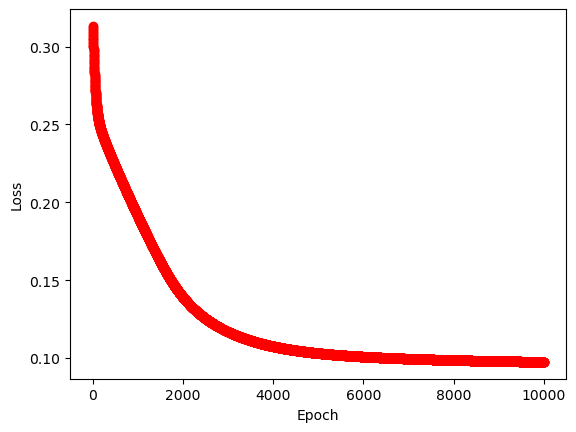

In [447]:
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss_values, 'ro')

In [448]:
data = np.loadtxt(os.path.join('Dat', 'ex2data1.txt'), delimiter=',')
data=np.array(data)
X, y = data[:, :1], data[:, 2]
y=y.reshape(-1,1)
# Print the shape of the dataset
print("Dataset shape:", X.shape, y.shape)

Dataset shape: (100, 1) (100, 1)


In [449]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [450]:
network = NeuralNetwork(input_nodes=1, hidden_layers=4, hidden_nodes=1, output_nodes=1)

# Reshape the labels to match the network's output shape
loss_values=network.train(X_train, y_train, learning_rate=0.1, num_epochs=10000)

# After training, you can make predictions on new data

predictions = network.predict(y_test)

print("Predictions:")
print(predictions)

Epoch 1/10000, Loss: 0.2523
Epoch 2/10000, Loss: 0.2521
Epoch 3/10000, Loss: 0.2518
Epoch 4/10000, Loss: 0.2516
Epoch 5/10000, Loss: 0.2514
Epoch 6/10000, Loss: 0.2512
Epoch 7/10000, Loss: 0.2510
Epoch 8/10000, Loss: 0.2508
Epoch 9/10000, Loss: 0.2506
Epoch 10/10000, Loss: 0.2505
Epoch 11/10000, Loss: 0.2503
Epoch 12/10000, Loss: 0.2501
Epoch 13/10000, Loss: 0.2499
Epoch 14/10000, Loss: 0.2497
Epoch 15/10000, Loss: 0.2496
Epoch 16/10000, Loss: 0.2494
Epoch 17/10000, Loss: 0.2492
Epoch 18/10000, Loss: 0.2491
Epoch 19/10000, Loss: 0.2489
Epoch 20/10000, Loss: 0.2488
Epoch 21/10000, Loss: 0.2486
Epoch 22/10000, Loss: 0.2485
Epoch 23/10000, Loss: 0.2483
Epoch 24/10000, Loss: 0.2482
Epoch 25/10000, Loss: 0.2480
Epoch 26/10000, Loss: 0.2479
Epoch 27/10000, Loss: 0.2477
Epoch 28/10000, Loss: 0.2476
Epoch 29/10000, Loss: 0.2475
Epoch 30/10000, Loss: 0.2473
Epoch 31/10000, Loss: 0.2472
Epoch 32/10000, Loss: 0.2471
Epoch 33/10000, Loss: 0.2470
Epoch 34/10000, Loss: 0.2468
Epoch 35/10000, Loss: 0

Epoch 725/10000, Loss: 0.2400
Epoch 726/10000, Loss: 0.2400
Epoch 727/10000, Loss: 0.2400
Epoch 728/10000, Loss: 0.2400
Epoch 729/10000, Loss: 0.2400
Epoch 730/10000, Loss: 0.2400
Epoch 731/10000, Loss: 0.2400
Epoch 732/10000, Loss: 0.2400
Epoch 733/10000, Loss: 0.2400
Epoch 734/10000, Loss: 0.2400
Epoch 735/10000, Loss: 0.2400
Epoch 736/10000, Loss: 0.2400
Epoch 737/10000, Loss: 0.2400
Epoch 738/10000, Loss: 0.2400
Epoch 739/10000, Loss: 0.2400
Epoch 740/10000, Loss: 0.2400
Epoch 741/10000, Loss: 0.2400
Epoch 742/10000, Loss: 0.2400
Epoch 743/10000, Loss: 0.2400
Epoch 744/10000, Loss: 0.2400
Epoch 745/10000, Loss: 0.2400
Epoch 746/10000, Loss: 0.2400
Epoch 747/10000, Loss: 0.2400
Epoch 748/10000, Loss: 0.2400
Epoch 749/10000, Loss: 0.2400
Epoch 750/10000, Loss: 0.2400
Epoch 751/10000, Loss: 0.2400
Epoch 752/10000, Loss: 0.2400
Epoch 753/10000, Loss: 0.2400
Epoch 754/10000, Loss: 0.2400
Epoch 755/10000, Loss: 0.2400
Epoch 756/10000, Loss: 0.2400
Epoch 757/10000, Loss: 0.2400
Epoch 758/

Epoch 1565/10000, Loss: 0.2400
Epoch 1566/10000, Loss: 0.2400
Epoch 1567/10000, Loss: 0.2400
Epoch 1568/10000, Loss: 0.2400
Epoch 1569/10000, Loss: 0.2400
Epoch 1570/10000, Loss: 0.2400
Epoch 1571/10000, Loss: 0.2400
Epoch 1572/10000, Loss: 0.2400
Epoch 1573/10000, Loss: 0.2400
Epoch 1574/10000, Loss: 0.2400
Epoch 1575/10000, Loss: 0.2400
Epoch 1576/10000, Loss: 0.2400
Epoch 1577/10000, Loss: 0.2400
Epoch 1578/10000, Loss: 0.2400
Epoch 1579/10000, Loss: 0.2400
Epoch 1580/10000, Loss: 0.2400
Epoch 1581/10000, Loss: 0.2400
Epoch 1582/10000, Loss: 0.2400
Epoch 1583/10000, Loss: 0.2400
Epoch 1584/10000, Loss: 0.2400
Epoch 1585/10000, Loss: 0.2400
Epoch 1586/10000, Loss: 0.2400
Epoch 1587/10000, Loss: 0.2400
Epoch 1588/10000, Loss: 0.2400
Epoch 1589/10000, Loss: 0.2400
Epoch 1590/10000, Loss: 0.2400
Epoch 1591/10000, Loss: 0.2400
Epoch 1592/10000, Loss: 0.2400
Epoch 1593/10000, Loss: 0.2400
Epoch 1594/10000, Loss: 0.2400
Epoch 1595/10000, Loss: 0.2400
Epoch 1596/10000, Loss: 0.2400
Epoch 15

Epoch 2320/10000, Loss: 0.2400
Epoch 2321/10000, Loss: 0.2400
Epoch 2322/10000, Loss: 0.2400
Epoch 2323/10000, Loss: 0.2400
Epoch 2324/10000, Loss: 0.2400
Epoch 2325/10000, Loss: 0.2400
Epoch 2326/10000, Loss: 0.2400
Epoch 2327/10000, Loss: 0.2400
Epoch 2328/10000, Loss: 0.2400
Epoch 2329/10000, Loss: 0.2400
Epoch 2330/10000, Loss: 0.2400
Epoch 2331/10000, Loss: 0.2400
Epoch 2332/10000, Loss: 0.2400
Epoch 2333/10000, Loss: 0.2400
Epoch 2334/10000, Loss: 0.2400
Epoch 2335/10000, Loss: 0.2400
Epoch 2336/10000, Loss: 0.2400
Epoch 2337/10000, Loss: 0.2400
Epoch 2338/10000, Loss: 0.2400
Epoch 2339/10000, Loss: 0.2400
Epoch 2340/10000, Loss: 0.2400
Epoch 2341/10000, Loss: 0.2400
Epoch 2342/10000, Loss: 0.2400
Epoch 2343/10000, Loss: 0.2400
Epoch 2344/10000, Loss: 0.2400
Epoch 2345/10000, Loss: 0.2400
Epoch 2346/10000, Loss: 0.2400
Epoch 2347/10000, Loss: 0.2400
Epoch 2348/10000, Loss: 0.2400
Epoch 2349/10000, Loss: 0.2400
Epoch 2350/10000, Loss: 0.2400
Epoch 2351/10000, Loss: 0.2400
Epoch 23

Epoch 3092/10000, Loss: 0.2400
Epoch 3093/10000, Loss: 0.2400
Epoch 3094/10000, Loss: 0.2400
Epoch 3095/10000, Loss: 0.2400
Epoch 3096/10000, Loss: 0.2400
Epoch 3097/10000, Loss: 0.2400
Epoch 3098/10000, Loss: 0.2400
Epoch 3099/10000, Loss: 0.2400
Epoch 3100/10000, Loss: 0.2400
Epoch 3101/10000, Loss: 0.2400
Epoch 3102/10000, Loss: 0.2400
Epoch 3103/10000, Loss: 0.2400
Epoch 3104/10000, Loss: 0.2400
Epoch 3105/10000, Loss: 0.2400
Epoch 3106/10000, Loss: 0.2400
Epoch 3107/10000, Loss: 0.2400
Epoch 3108/10000, Loss: 0.2400
Epoch 3109/10000, Loss: 0.2400
Epoch 3110/10000, Loss: 0.2400
Epoch 3111/10000, Loss: 0.2400
Epoch 3112/10000, Loss: 0.2400
Epoch 3113/10000, Loss: 0.2400
Epoch 3114/10000, Loss: 0.2400
Epoch 3115/10000, Loss: 0.2400
Epoch 3116/10000, Loss: 0.2400
Epoch 3117/10000, Loss: 0.2400
Epoch 3118/10000, Loss: 0.2400
Epoch 3119/10000, Loss: 0.2400
Epoch 3120/10000, Loss: 0.2400
Epoch 3121/10000, Loss: 0.2400
Epoch 3122/10000, Loss: 0.2400
Epoch 3123/10000, Loss: 0.2400
Epoch 31

Epoch 3890/10000, Loss: 0.2400
Epoch 3891/10000, Loss: 0.2400
Epoch 3892/10000, Loss: 0.2400
Epoch 3893/10000, Loss: 0.2400
Epoch 3894/10000, Loss: 0.2400
Epoch 3895/10000, Loss: 0.2400
Epoch 3896/10000, Loss: 0.2400
Epoch 3897/10000, Loss: 0.2400
Epoch 3898/10000, Loss: 0.2400
Epoch 3899/10000, Loss: 0.2400
Epoch 3900/10000, Loss: 0.2400
Epoch 3901/10000, Loss: 0.2400
Epoch 3902/10000, Loss: 0.2400
Epoch 3903/10000, Loss: 0.2400
Epoch 3904/10000, Loss: 0.2400
Epoch 3905/10000, Loss: 0.2400
Epoch 3906/10000, Loss: 0.2400
Epoch 3907/10000, Loss: 0.2400
Epoch 3908/10000, Loss: 0.2400
Epoch 3909/10000, Loss: 0.2400
Epoch 3910/10000, Loss: 0.2400
Epoch 3911/10000, Loss: 0.2400
Epoch 3912/10000, Loss: 0.2400
Epoch 3913/10000, Loss: 0.2400
Epoch 3914/10000, Loss: 0.2400
Epoch 3915/10000, Loss: 0.2400
Epoch 3916/10000, Loss: 0.2400
Epoch 3917/10000, Loss: 0.2400
Epoch 3918/10000, Loss: 0.2400
Epoch 3919/10000, Loss: 0.2400
Epoch 3920/10000, Loss: 0.2400
Epoch 3921/10000, Loss: 0.2400
Epoch 39

Epoch 4540/10000, Loss: 0.2400
Epoch 4541/10000, Loss: 0.2400
Epoch 4542/10000, Loss: 0.2400
Epoch 4543/10000, Loss: 0.2400
Epoch 4544/10000, Loss: 0.2400
Epoch 4545/10000, Loss: 0.2400
Epoch 4546/10000, Loss: 0.2400
Epoch 4547/10000, Loss: 0.2400
Epoch 4548/10000, Loss: 0.2400
Epoch 4549/10000, Loss: 0.2400
Epoch 4550/10000, Loss: 0.2400
Epoch 4551/10000, Loss: 0.2400
Epoch 4552/10000, Loss: 0.2400
Epoch 4553/10000, Loss: 0.2400
Epoch 4554/10000, Loss: 0.2400
Epoch 4555/10000, Loss: 0.2400
Epoch 4556/10000, Loss: 0.2400
Epoch 4557/10000, Loss: 0.2400
Epoch 4558/10000, Loss: 0.2400
Epoch 4559/10000, Loss: 0.2400
Epoch 4560/10000, Loss: 0.2400
Epoch 4561/10000, Loss: 0.2400
Epoch 4562/10000, Loss: 0.2400
Epoch 4563/10000, Loss: 0.2400
Epoch 4564/10000, Loss: 0.2400
Epoch 4565/10000, Loss: 0.2400
Epoch 4566/10000, Loss: 0.2400
Epoch 4567/10000, Loss: 0.2400
Epoch 4568/10000, Loss: 0.2400
Epoch 4569/10000, Loss: 0.2400
Epoch 4570/10000, Loss: 0.2400
Epoch 4571/10000, Loss: 0.2400
Epoch 45

Epoch 5290/10000, Loss: 0.2400
Epoch 5291/10000, Loss: 0.2400
Epoch 5292/10000, Loss: 0.2400
Epoch 5293/10000, Loss: 0.2400
Epoch 5294/10000, Loss: 0.2400
Epoch 5295/10000, Loss: 0.2400
Epoch 5296/10000, Loss: 0.2400
Epoch 5297/10000, Loss: 0.2400
Epoch 5298/10000, Loss: 0.2400
Epoch 5299/10000, Loss: 0.2400
Epoch 5300/10000, Loss: 0.2400
Epoch 5301/10000, Loss: 0.2400
Epoch 5302/10000, Loss: 0.2400
Epoch 5303/10000, Loss: 0.2400
Epoch 5304/10000, Loss: 0.2400
Epoch 5305/10000, Loss: 0.2400
Epoch 5306/10000, Loss: 0.2400
Epoch 5307/10000, Loss: 0.2400
Epoch 5308/10000, Loss: 0.2400
Epoch 5309/10000, Loss: 0.2400
Epoch 5310/10000, Loss: 0.2400
Epoch 5311/10000, Loss: 0.2400
Epoch 5312/10000, Loss: 0.2400
Epoch 5313/10000, Loss: 0.2400
Epoch 5314/10000, Loss: 0.2400
Epoch 5315/10000, Loss: 0.2400
Epoch 5316/10000, Loss: 0.2400
Epoch 5317/10000, Loss: 0.2400
Epoch 5318/10000, Loss: 0.2400
Epoch 5319/10000, Loss: 0.2400
Epoch 5320/10000, Loss: 0.2400
Epoch 5321/10000, Loss: 0.2400
Epoch 53

Epoch 5976/10000, Loss: 0.2400
Epoch 5977/10000, Loss: 0.2400
Epoch 5978/10000, Loss: 0.2400
Epoch 5979/10000, Loss: 0.2400
Epoch 5980/10000, Loss: 0.2400
Epoch 5981/10000, Loss: 0.2400
Epoch 5982/10000, Loss: 0.2400
Epoch 5983/10000, Loss: 0.2400
Epoch 5984/10000, Loss: 0.2400
Epoch 5985/10000, Loss: 0.2400
Epoch 5986/10000, Loss: 0.2400
Epoch 5987/10000, Loss: 0.2400
Epoch 5988/10000, Loss: 0.2400
Epoch 5989/10000, Loss: 0.2400
Epoch 5990/10000, Loss: 0.2400
Epoch 5991/10000, Loss: 0.2400
Epoch 5992/10000, Loss: 0.2400
Epoch 5993/10000, Loss: 0.2400
Epoch 5994/10000, Loss: 0.2400
Epoch 5995/10000, Loss: 0.2400
Epoch 5996/10000, Loss: 0.2400
Epoch 5997/10000, Loss: 0.2400
Epoch 5998/10000, Loss: 0.2400
Epoch 5999/10000, Loss: 0.2400
Epoch 6000/10000, Loss: 0.2400
Epoch 6001/10000, Loss: 0.2400
Epoch 6002/10000, Loss: 0.2400
Epoch 6003/10000, Loss: 0.2400
Epoch 6004/10000, Loss: 0.2400
Epoch 6005/10000, Loss: 0.2400
Epoch 6006/10000, Loss: 0.2400
Epoch 6007/10000, Loss: 0.2400
Epoch 60

Epoch 6958/10000, Loss: 0.2400
Epoch 6959/10000, Loss: 0.2400
Epoch 6960/10000, Loss: 0.2400
Epoch 6961/10000, Loss: 0.2400
Epoch 6962/10000, Loss: 0.2400
Epoch 6963/10000, Loss: 0.2400
Epoch 6964/10000, Loss: 0.2400
Epoch 6965/10000, Loss: 0.2400
Epoch 6966/10000, Loss: 0.2400
Epoch 6967/10000, Loss: 0.2400
Epoch 6968/10000, Loss: 0.2400
Epoch 6969/10000, Loss: 0.2400
Epoch 6970/10000, Loss: 0.2400
Epoch 6971/10000, Loss: 0.2400
Epoch 6972/10000, Loss: 0.2400
Epoch 6973/10000, Loss: 0.2400
Epoch 6974/10000, Loss: 0.2400
Epoch 6975/10000, Loss: 0.2400
Epoch 6976/10000, Loss: 0.2400
Epoch 6977/10000, Loss: 0.2400
Epoch 6978/10000, Loss: 0.2400
Epoch 6979/10000, Loss: 0.2400
Epoch 6980/10000, Loss: 0.2400
Epoch 6981/10000, Loss: 0.2400
Epoch 6982/10000, Loss: 0.2400
Epoch 6983/10000, Loss: 0.2400
Epoch 6984/10000, Loss: 0.2400
Epoch 6985/10000, Loss: 0.2400
Epoch 6986/10000, Loss: 0.2400
Epoch 6987/10000, Loss: 0.2400
Epoch 6988/10000, Loss: 0.2400
Epoch 6989/10000, Loss: 0.2400
Epoch 69

Epoch 7728/10000, Loss: 0.2400
Epoch 7729/10000, Loss: 0.2400
Epoch 7730/10000, Loss: 0.2400
Epoch 7731/10000, Loss: 0.2400
Epoch 7732/10000, Loss: 0.2400
Epoch 7733/10000, Loss: 0.2400
Epoch 7734/10000, Loss: 0.2400
Epoch 7735/10000, Loss: 0.2400
Epoch 7736/10000, Loss: 0.2400
Epoch 7737/10000, Loss: 0.2400
Epoch 7738/10000, Loss: 0.2400
Epoch 7739/10000, Loss: 0.2400
Epoch 7740/10000, Loss: 0.2400
Epoch 7741/10000, Loss: 0.2400
Epoch 7742/10000, Loss: 0.2400
Epoch 7743/10000, Loss: 0.2400
Epoch 7744/10000, Loss: 0.2400
Epoch 7745/10000, Loss: 0.2400
Epoch 7746/10000, Loss: 0.2400
Epoch 7747/10000, Loss: 0.2400
Epoch 7748/10000, Loss: 0.2400
Epoch 7749/10000, Loss: 0.2400
Epoch 7750/10000, Loss: 0.2400
Epoch 7751/10000, Loss: 0.2400
Epoch 7752/10000, Loss: 0.2400
Epoch 7753/10000, Loss: 0.2400
Epoch 7754/10000, Loss: 0.2400
Epoch 7755/10000, Loss: 0.2400
Epoch 7756/10000, Loss: 0.2400
Epoch 7757/10000, Loss: 0.2400
Epoch 7758/10000, Loss: 0.2400
Epoch 7759/10000, Loss: 0.2400
Epoch 77

Epoch 8415/10000, Loss: 0.2400
Epoch 8416/10000, Loss: 0.2400
Epoch 8417/10000, Loss: 0.2400
Epoch 8418/10000, Loss: 0.2400
Epoch 8419/10000, Loss: 0.2400
Epoch 8420/10000, Loss: 0.2400
Epoch 8421/10000, Loss: 0.2400
Epoch 8422/10000, Loss: 0.2400
Epoch 8423/10000, Loss: 0.2400
Epoch 8424/10000, Loss: 0.2400
Epoch 8425/10000, Loss: 0.2400
Epoch 8426/10000, Loss: 0.2400
Epoch 8427/10000, Loss: 0.2400
Epoch 8428/10000, Loss: 0.2400
Epoch 8429/10000, Loss: 0.2400
Epoch 8430/10000, Loss: 0.2400
Epoch 8431/10000, Loss: 0.2400
Epoch 8432/10000, Loss: 0.2400
Epoch 8433/10000, Loss: 0.2400
Epoch 8434/10000, Loss: 0.2400
Epoch 8435/10000, Loss: 0.2400
Epoch 8436/10000, Loss: 0.2400
Epoch 8437/10000, Loss: 0.2400
Epoch 8438/10000, Loss: 0.2400
Epoch 8439/10000, Loss: 0.2400
Epoch 8440/10000, Loss: 0.2400
Epoch 8441/10000, Loss: 0.2400
Epoch 8442/10000, Loss: 0.2400
Epoch 8443/10000, Loss: 0.2400
Epoch 8444/10000, Loss: 0.2400
Epoch 8445/10000, Loss: 0.2400
Epoch 8446/10000, Loss: 0.2400
Epoch 84

Epoch 8947/10000, Loss: 0.2400
Epoch 8948/10000, Loss: 0.2400
Epoch 8949/10000, Loss: 0.2400
Epoch 8950/10000, Loss: 0.2400
Epoch 8951/10000, Loss: 0.2400
Epoch 8952/10000, Loss: 0.2400
Epoch 8953/10000, Loss: 0.2400
Epoch 8954/10000, Loss: 0.2400
Epoch 8955/10000, Loss: 0.2400
Epoch 8956/10000, Loss: 0.2400
Epoch 8957/10000, Loss: 0.2400
Epoch 8958/10000, Loss: 0.2400
Epoch 8959/10000, Loss: 0.2400
Epoch 8960/10000, Loss: 0.2400
Epoch 8961/10000, Loss: 0.2400
Epoch 8962/10000, Loss: 0.2400
Epoch 8963/10000, Loss: 0.2400
Epoch 8964/10000, Loss: 0.2400
Epoch 8965/10000, Loss: 0.2400
Epoch 8966/10000, Loss: 0.2400
Epoch 8967/10000, Loss: 0.2400
Epoch 8968/10000, Loss: 0.2400
Epoch 8969/10000, Loss: 0.2400
Epoch 8970/10000, Loss: 0.2400
Epoch 8971/10000, Loss: 0.2400
Epoch 8972/10000, Loss: 0.2400
Epoch 8973/10000, Loss: 0.2400
Epoch 8974/10000, Loss: 0.2400
Epoch 8975/10000, Loss: 0.2400
Epoch 8976/10000, Loss: 0.2400
Epoch 8977/10000, Loss: 0.2400
Epoch 8978/10000, Loss: 0.2400
Epoch 89

Epoch 9437/10000, Loss: 0.2400
Epoch 9438/10000, Loss: 0.2400
Epoch 9439/10000, Loss: 0.2400
Epoch 9440/10000, Loss: 0.2400
Epoch 9441/10000, Loss: 0.2400
Epoch 9442/10000, Loss: 0.2400
Epoch 9443/10000, Loss: 0.2400
Epoch 9444/10000, Loss: 0.2400
Epoch 9445/10000, Loss: 0.2400
Epoch 9446/10000, Loss: 0.2400
Epoch 9447/10000, Loss: 0.2400
Epoch 9448/10000, Loss: 0.2400
Epoch 9449/10000, Loss: 0.2400
Epoch 9450/10000, Loss: 0.2400
Epoch 9451/10000, Loss: 0.2400
Epoch 9452/10000, Loss: 0.2400
Epoch 9453/10000, Loss: 0.2400
Epoch 9454/10000, Loss: 0.2400
Epoch 9455/10000, Loss: 0.2400
Epoch 9456/10000, Loss: 0.2400
Epoch 9457/10000, Loss: 0.2400
Epoch 9458/10000, Loss: 0.2400
Epoch 9459/10000, Loss: 0.2400
Epoch 9460/10000, Loss: 0.2400
Epoch 9461/10000, Loss: 0.2400
Epoch 9462/10000, Loss: 0.2400
Epoch 9463/10000, Loss: 0.2400
Epoch 9464/10000, Loss: 0.2400
Epoch 9465/10000, Loss: 0.2400
Epoch 9466/10000, Loss: 0.2400
Epoch 9467/10000, Loss: 0.2400
Epoch 9468/10000, Loss: 0.2400
Epoch 94

In [451]:
# Convert predicted probabilities to class labels
predicted_labels = np.round(predictions).astype(int)  # Replace 'predictions' with your actual predicted values
# Calculate accuracy
accuracy = np.mean(predicted_labels == y_test.reshape(-1, 1)) * 100
print("Accuracy:", accuracy)

Accuracy: 60.0


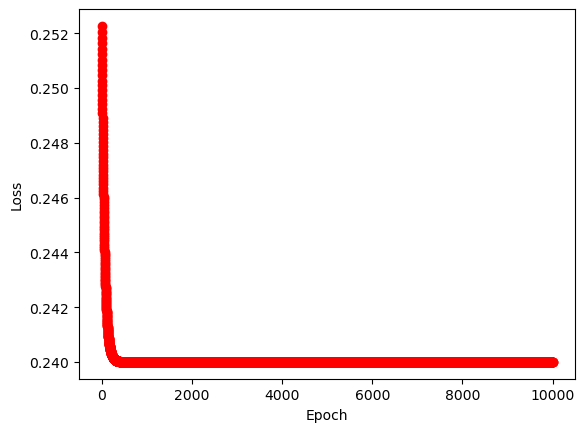

In [452]:
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss_values, 'ro')